# IMPORTING THE LIBRARIES

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# READING THE DATASET

In [10]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pbKzSgYXOxhT6iyvr6fl3Wm2_Rxh1eG-v12arDmHkZhx',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'waterqualityanalysis-donotdelete-pr-cnprvzwmfwysxj'
object_key = 'waterdatax.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


# ANALYSE THE DATA
 

In [11]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [12]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [14]:
data.shape

(1991, 12)

# HANDLING THE MISSING VALUES

In [15]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

# HANDLING MISSING VALUES-2

In [16]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [17]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [18]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

# HANDLING MISSING VALUES-3


In [19]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [20]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [21]:
data=data.rename(columns={'D.O. (mg/l)':'do'})
data=data.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns={'B.O.D. (mg/l)':'bod'})
data=data.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns={'STATION CODE':'station'})
data=data.rename(columns={'LOCATIONS':'location'})
data=data.rename(columns={'STATE':'state'})
data=data.rename(columns={'PH':'ph'})

In [22]:
data

,station,location,state,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,562.0,2003


# WATER QUALITY INDEX CALCULATION

# Calculation of WQI for pH

In [23]:
data['npH']=data.ph.apply(lambda x:(100 if (8.5>=x>=7)
else(80 if (8.6>=x>=8.5)or (6.9>=x>=6.8)
else(60 if (8.8>=x>=8.6)or (6.8>=x>=6.7)
else(40 if (9>=x>=8.8)or (6.7>=x>=6.5)
else 0)))))

In [24]:
data['npH']

0       100
1       100
2        80
3        80
4       100
       ... 
1986      0
1987      0
1988      0
1989      0
1990      0
Name: npH, Length: 1991, dtype: int64

# **Calculation of WQI for dissolved oxygen**


In [25]:
data['ndo']=data.do.apply(lambda x: (100 if (x>=6) 
else(80 if (6>=x>=5.1) 
else(60 if (5>=x>=4.1) 
else(40 if (4>=x>=3) 
else 0)))))

In [26]:
data['ndo']

0       100
1        80
2       100
3        80
4        80
       ... 
1986    100
1987    100
1988    100
1989    100
1990    100
Name: ndo, Length: 1991, dtype: int64

# Calculation of WQI for total coliform 

In [27]:
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)
else(80 if (50>=x>=5)
else(60 if (500>=x>=50)
else(40 if (10000>=x>=500)
else 0)))))

In [28]:
data['nco']

0       80
1       40
2       40
3       40
4       40
        ..
1986    60
1987    60
1988    40
1989    40
1990    40
Name: nco, Length: 1991, dtype: int64

# Calculation of WQI for B.D.O

In [29]:
data['nbdo']=data.bod.apply(lambda x: (100 if (3>=x>=0)
else(80 if (6>=x>=3)
else(60 if (80>=x>=6)
else(40 if (125>=x>=80)
else 0)))))

In [30]:
data['nbdo']

0        60
1       100
2       100
3        80
4       100
       ... 
1986    100
1987    100
1988    100
1989    100
1990    100
Name: nbdo, Length: 1991, dtype: int64

# WATER QUALITY INDEX CALCULATION - 2

# Calculation of electrical conductivity

In [31]:
data['nec']=data.co.apply(lambda x: (100 if (75>=x>=0)
else(80 if (150>=x>=75)
else(60 if (225>=x>=150)
else(40 if (300>=x>=225)
else 0)))))

In [32]:
data['nec']

0        60
1        60
2        60
3       100
4        80
       ... 
1986    100
1987    100
1988    100
1989    100
1990    100
Name: nec, Length: 1991, dtype: int64

# **Calculation of nitrate**

In [33]:
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)
else(80 if (50>=x>=20)
else(60 if (100>=x>=50)
else(40 if (200>=x>=100)
else 0)))))

In [34]:
data['nna']

0       100
1       100
2       100
3       100
4       100
       ... 
1986    100
1987    100
1988    100
1989    100
1990    100
Name: nna, Length: 1991, dtype: int64

# WATER QUALITY INDEX CALCULATION - 3

# Calculating water quality index

In [35]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec * 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco
data

,station,location,state,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,11,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


# Calculating the average of WQI

In [36]:
average=data.groupby( 'year')['wqi'].mean()
average.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

# **DATA VISUALIZATION**


# UNIVARIENT ANALYSIS 

# Count plot

<AxesSubplot:xlabel='ph', ylabel='count'>

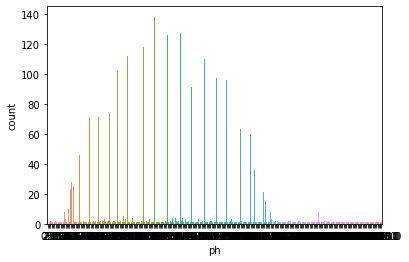

In [37]:
sns.countplot(data["ph"])

# Box plot

<AxesSubplot:xlabel='nco'>

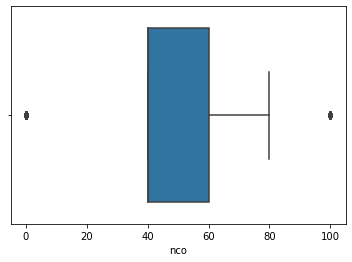

In [38]:
sns.boxplot(data["nco"])

# Dist plot

<AxesSubplot:xlabel='Temp', ylabel='Density'>

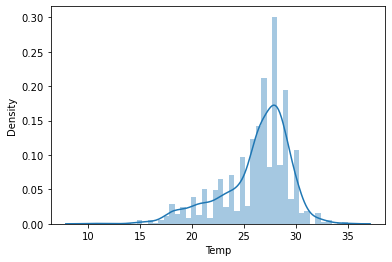

In [39]:
sns.distplot(data['Temp'])

# Histogram

<AxesSubplot:xlabel='Temp', ylabel='Count'>

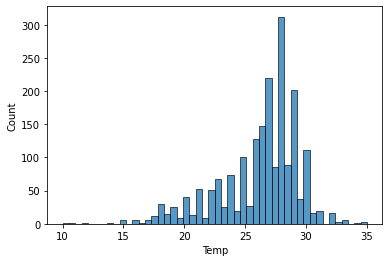

In [40]:
sns.histplot(data["Temp"])

# BIVARIENT ANALYSIS

# Scatter plot

<AxesSubplot:xlabel='nco', ylabel='bod'>

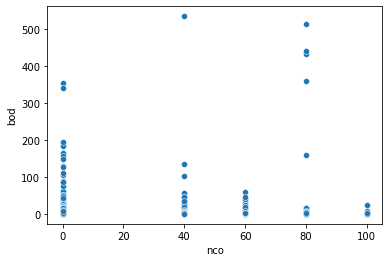

In [41]:
sns.scatterplot(data.nco,data.bod)

# Bar plot

<AxesSubplot:xlabel='nbdo', ylabel='ph'>

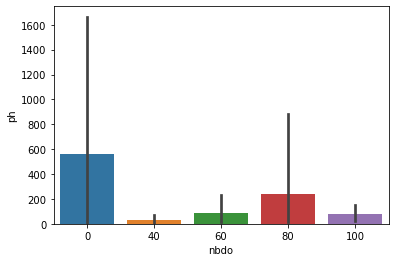

In [42]:
 sns.barplot(data.nbdo,data.ph)

# **LABEL ENCODING**

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
data["state"] = le.fit_transform(data["state"])
data["location"] = le.fit_transform(data["location"])
data["station"] = le.fit_transform(data["station"])

In [45]:
data

,station,location,state,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,32,83,21,30.600000,6.7,7.5,203.0,6.940049,0.100000,11,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,33,664,51,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,56,665,51,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,260,495,51,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,261,496,51,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,25,537,101,26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,48,345,101,29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,35,154,101,28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,36,151,101,28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


# SPLITTING DEPENDENT AND INDEPENDENT COLUMNS

In [46]:
data.head()
data.drop(['location','station','state'],axis=1,inplace=True)

In [47]:
data.drop([("FECAL COLIFORM (MPN/100ml)")],axis=1,inplace=True)
data

,Temp,do,ph,co,bod,na,tc,year,npH,ndo,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014,100,100,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014,100,80,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014,80,100,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014,80,80,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014,100,80,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003,0,100,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003,0,100,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003,0,100,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003,0,100,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [48]:
x = data.iloc[:,1:7].values
x

array([[6.70000000e+00, 7.50000000e+00, 2.03000000e+02, 6.94004877e+00,
        1.00000000e-01, 2.70000000e+01],
       [5.70000000e+00, 7.20000000e+00, 1.89000000e+02, 2.00000000e+00,
        2.00000000e-01, 8.39100000e+03],
       [6.30000000e+00, 6.90000000e+00, 1.79000000e+02, 1.70000000e+00,
        1.00000000e-01, 5.33000000e+03],
       ...,
       [7.60000000e+00, 9.80000000e+01, 6.20000000e+00, 1.20000000e+00,
        1.62307871e+00, 5.70000000e+02],
       [7.70000000e+00, 9.10000000e+01, 6.50000000e+00, 1.30000000e+00,
        1.62307871e+00, 5.62000000e+02],
       [7.60000000e+00, 1.10000000e+02, 5.70000000e+00, 1.10000000e+00,
        1.62307871e+00, 5.46000000e+02]])

In [49]:
x.shape

(1991, 6)

In [50]:
y = data.iloc[:,-1:].values
y

array([[84.46],
       [76.96],
       [79.28],
       ...,
       [66.44],
       [66.44],
       [66.44]])

In [51]:
y.shape

(1991, 1)

# SPLITTING DATA INTO TRAIN AND TEST

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2, random_state=10 )

# FEATURE SCALING

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# MODEL BUILDING

In [56]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)

# MODEL EVALUATION

In [57]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,y_pred))
print('Mean squared Error:',metrics.mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute Error: 0.9872080200501312
Mean squared Error: 5.555095879699248
Root Mean Squared Error: 2.3569250899634566


In [58]:
metrics.r2_score(Y_test,y_pred)

0.96971918125809

# SAVE THE MODEL

In [59]:
import pickle
pickle.dump(regressor,open('water.pkl','wb'))
model=pickle.load(open('water.pkl','rb'))

In [61]:
!pip install -U ibm-watson-machine-learning

In [62]:
from ibm_watson_machine_learning import APIClient
import json
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"OQL8oAHIjOJcwFm87Sjph2Kyq8CQbFM6InOW8uUrqWsy"
}
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------  ------------------------
ID                                    NAME     CREATED
92f3cb46-0491-498d-b638-3b35ba6e4dc4  WQAPUML  2022-11-15T13:18:54.372Z
------------------------------------  -------  ------------------------


In [63]:
spaceid="92f3cb46-0491-498d-b638-3b35ba6e4dc4"

In [64]:
wml_client.set.default_space(spaceid)

'SUCCESS'

In [65]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [66]:
import sklearn
sklearn.__version__

'1.0.2'

In [67]:
MODEL_NAME ='WQI_MODEL'
DEPLOYMENT_NAME='deploywqi'
DEMO_MODEL= regressor

In [69]:
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [70]:
model_props={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [72]:
model_details=wml_client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=X_train,
    training_target=Y_train
)


In [73]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-15T13:50:58.281Z',
  'id': '6c643ec9-3bab-4913-9980-6fee9711defb',
  'modified_at': '2022-11-15T13:51:01.404Z',
  'name': 'WQI_MODEL',
  'owner': 'IBMid-662003UUTZ',
  'resource_key': 'e14af30b-3add-4fa6-b16c-186ed1997cd8',
  'space_id': '92f3cb46-0491-498d-b638-3b35ba6e4dc4'},
 'system': {'warnings': []}}

In [74]:
model_id=wml_client.repository.get_model_id(model_details)
model_id

'6c643ec9-3bab-4913-9980-6fee9711defb'

In [75]:
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [76]:
deployment=wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '6c643ec9-3bab-4913-9980-6fee9711defb' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='71779ca1-e7fa-441f-ae24-84bd5bb004b1'
------------------------------------------------------------------------------------------------


